In [1]:
# Import packages

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# Read in data

data = pd.read_csv("Procrustes_all.csv")

In [3]:
# Subset data for each species

riparia = data[ data['species']=="Vitis_riparia" ]
labrusca = data[ data['species']=="Vitis_labrusca" ]
rupestris = data[ data['species']=="Vitis_rupestris" ]
cinerea = data[ data['species']=="Vitis_cinerea" ]
acerifolia = data[ data['species']=="Vitis_acerifolia" ]
amurensis = data[ data['species']=="Vitis_amurensis" ]
vulpina = data[ data['species']=="Vitis_vulpina" ]
aestivalis = data[ data['species']=="Vitis_aestivalis" ]
palmata = data[ data['species']=="Vitis_palmata" ]
ampelopsis = data[ data['species']=="Ampelopsis_brevipedunculata" ]

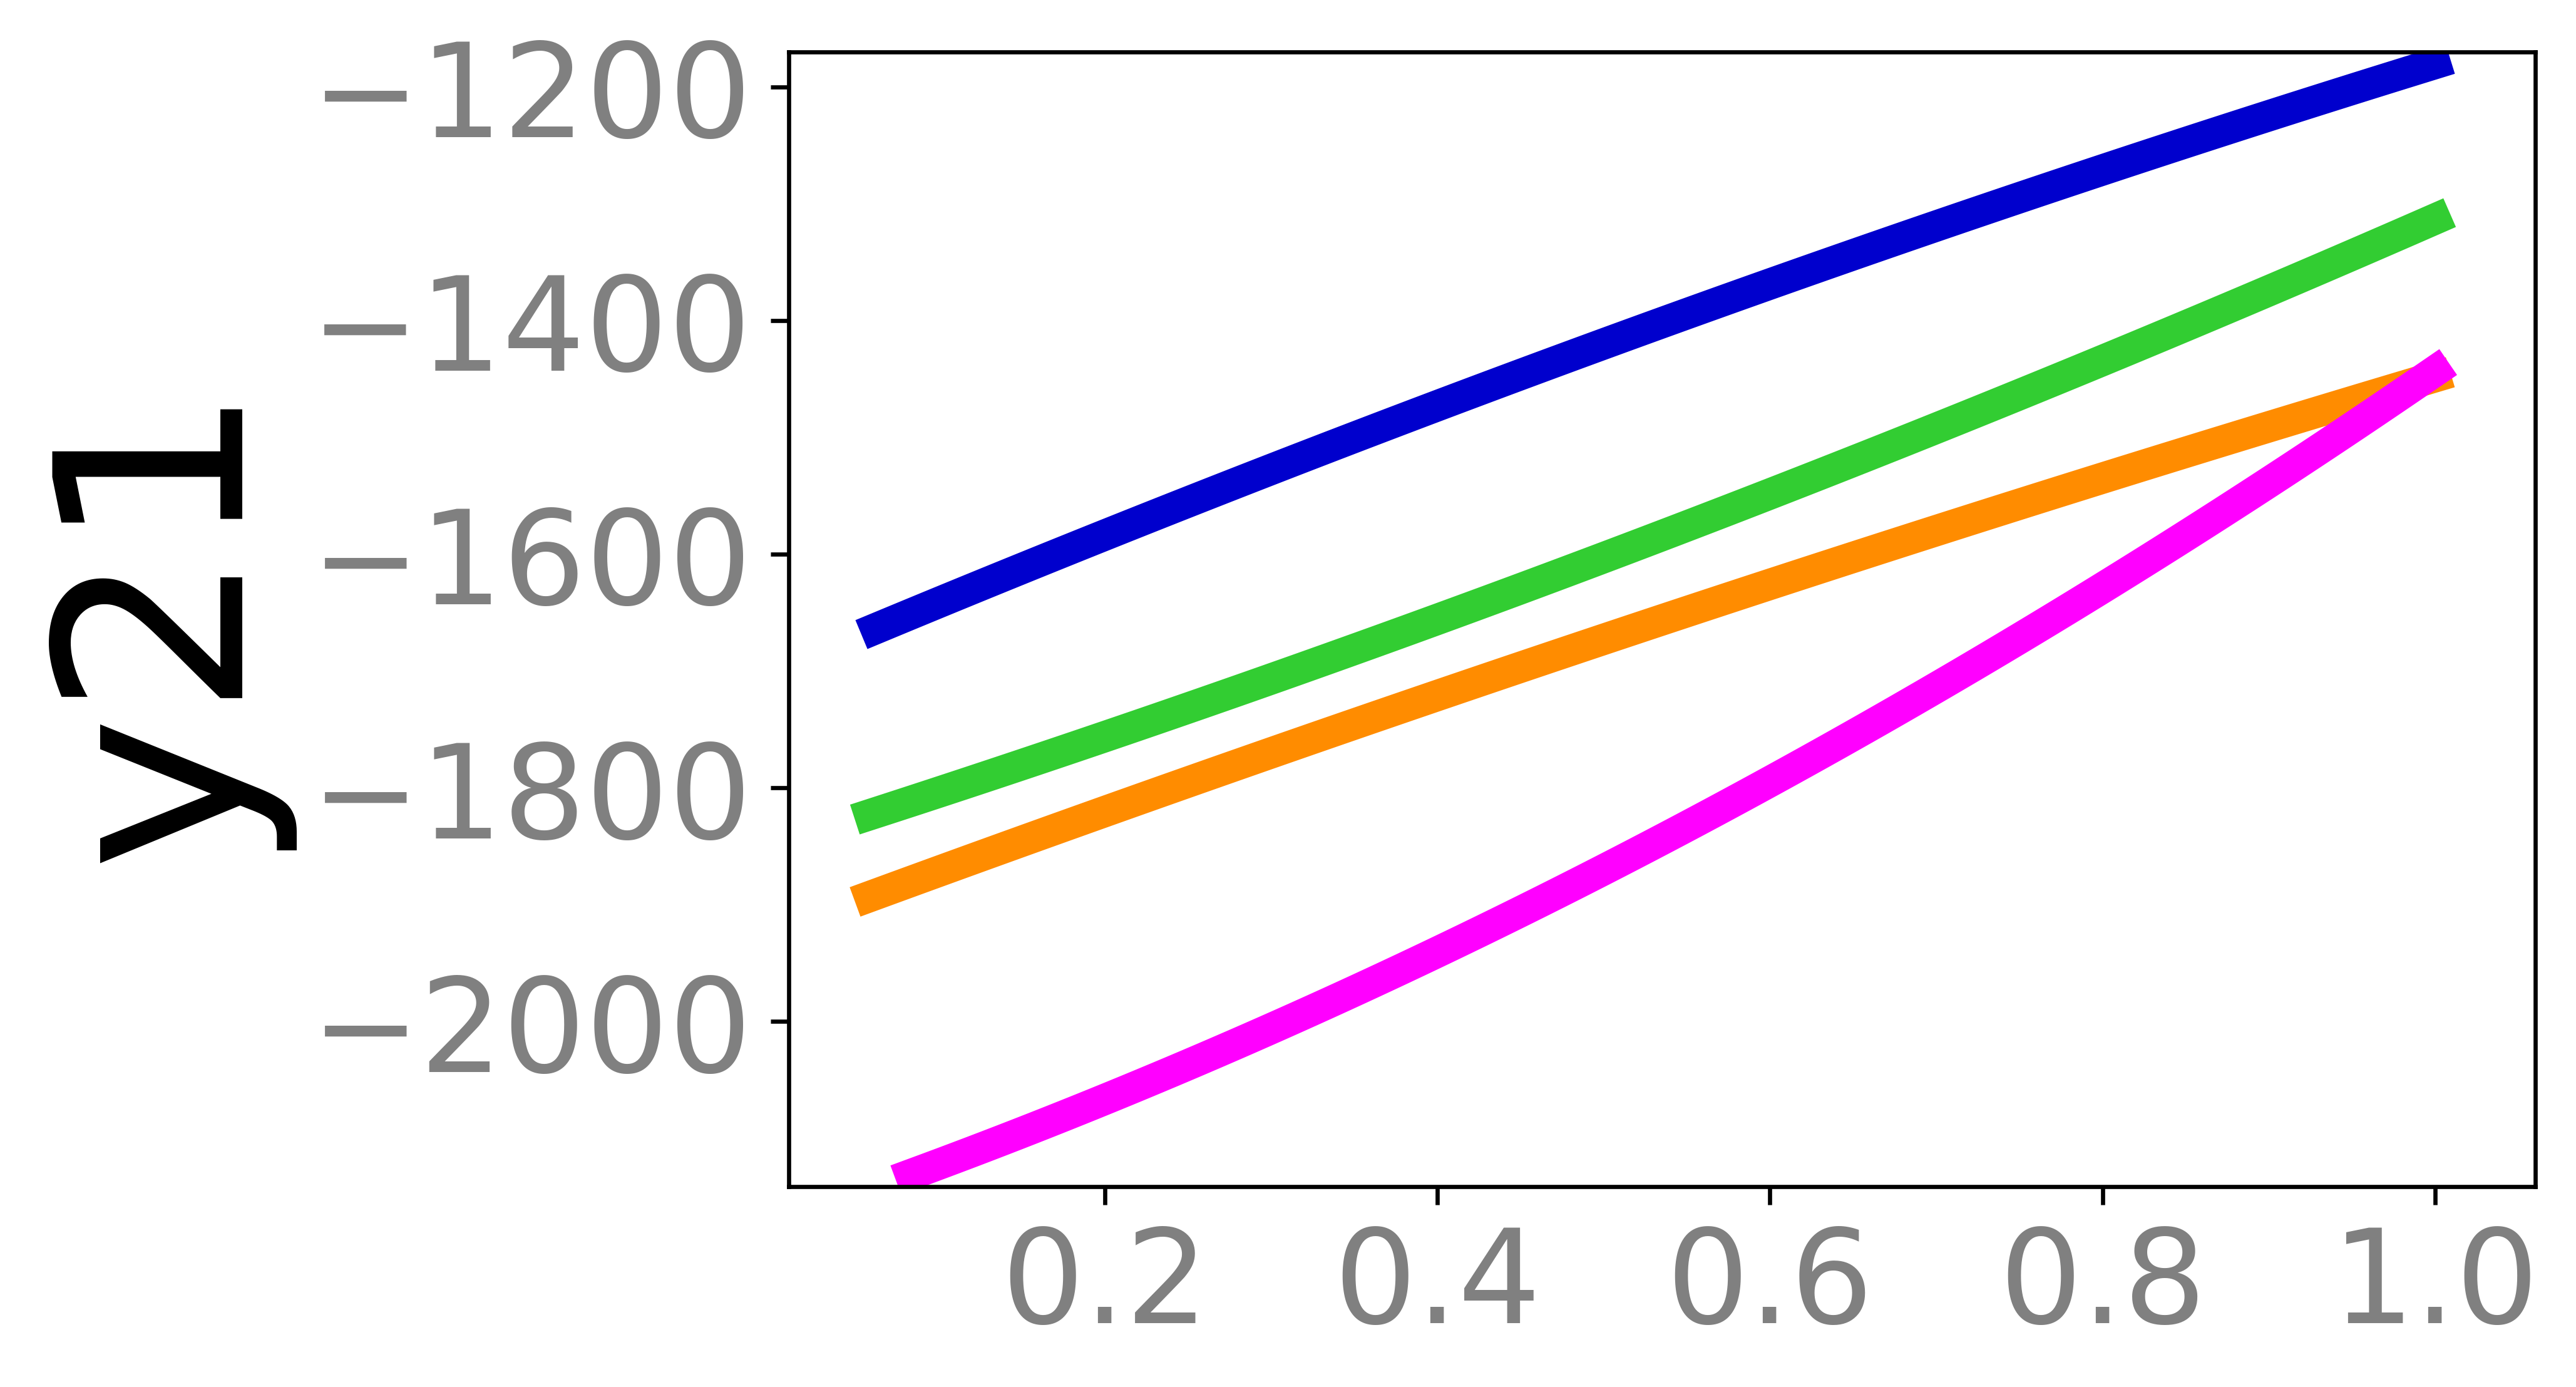

In [48]:
# For each variable, fit a 2nd degree polynomial for its value across the shoot
# Fit models and graph for representative species

variable = 'y21'

rip = np.polyfit(riparia['heteroblasty'], riparia[variable],2)
rip_func = np.poly1d(rip)

rup = np.polyfit(rupestris['heteroblasty'], rupestris[variable],2)
rup_func = np.poly1d(rup)

ace = np.polyfit(acerifolia['heteroblasty'], acerifolia[variable],2)
ace_func = np.poly1d(ace)

amp = np.polyfit(ampelopsis['heteroblasty'], ampelopsis[variable],2)
amp_func = np.poly1d(amp)

rip_max = max(rip_func(np.linspace(min(riparia['heteroblasty']), max(riparia['heteroblasty']))))
rup_max = max(rup_func(np.linspace(min(rupestris['heteroblasty']), max(rupestris['heteroblasty']))))
ace_max = max(ace_func(np.linspace(min(acerifolia['heteroblasty']), max(acerifolia['heteroblasty']))))
amp_max = max(amp_func(np.linspace(min(ampelopsis['heteroblasty']), max(ampelopsis['heteroblasty']))))
all_max = max(rip_max, rup_max, ace_max, amp_max)


rip_min = min(rip_func(np.linspace(min(riparia['heteroblasty']), max(riparia['heteroblasty']))))
rup_min = min(rup_func(np.linspace(min(rupestris['heteroblasty']), max(rupestris['heteroblasty']))))
ace_min = min(ace_func(np.linspace(min(acerifolia['heteroblasty']), max(acerifolia['heteroblasty']))))
amp_min = min(amp_func(np.linspace(min(ampelopsis['heteroblasty']), max(ampelopsis['heteroblasty']))))
all_min = min(rip_min, rup_min, ace_min, amp_min)


plt.plot( np.linspace(min(riparia['heteroblasty']), max(riparia['heteroblasty']), 100),
         rip_func(np.linspace(min(riparia['heteroblasty']), max(riparia['heteroblasty']), 100)), color="#ff8c00", lw=6)

plt.plot( np.linspace(min(rupestris['heteroblasty']), max(rupestris['heteroblasty']), 100),
         rup_func(np.linspace(min(rupestris['heteroblasty']), max(rupestris['heteroblasty']), 100)), color="#0000cd", lw=6)

plt.plot( np.linspace(min(acerifolia['heteroblasty']), max(acerifolia['heteroblasty']), 100),
         ace_func(np.linspace(min(acerifolia['heteroblasty']), max(acerifolia['heteroblasty']), 100)), color="#32cd32", lw=6)

plt.plot( np.linspace(min(ampelopsis['heteroblasty']), max(ampelopsis['heteroblasty']), 100),
         amp_func(np.linspace(min(ampelopsis['heteroblasty']), max(ampelopsis['heteroblasty']), 100)), color="#ff00ff", lw=6)

plt.ylim(all_min-10, all_max+10)
plt.xlim(0.01, 1.06)
plt.ylabel(variable, size=50)
plt.yticks(fontsize=25, color="gray")
plt.xticks(fontsize=25, color="gray")

plt.rcParams['figure.dpi'] = 600

In [49]:
# Save modeled results of variable changes across the shoot
# The function "format_array" creates a properly formatted array from dataframe
# The function "create_dataset" takes a dataframe, polynomial order,
# xvals, and a label and returns modeled values for xvals across a shoot

def format_array(dataframe):
    
    df = dataframe
    df_vals = df.drop(columns=['vine','year','vine_year','species','from_tip','count','bin',
                               'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                               'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17',
                               'PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25',
                               'PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33',
                               'PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41',
                               'PC42'])
    
    df_array = df_vals.values
    return df_array

def create_dataset(dataframe, poly_order, xvals, label):
    
    array = format_array(dataframe)
        
    matrix = np.zeros((42, xvals))

    for i in range(42):

        N = np.polyfit( array[:,0], array[:,i+1], poly_order )
        func = np.poly1d(N)
        model_values = func( np.linspace(min(array[:,0]), max(array[:,0]), xvals) )
        matrix[i,:] = model_values

    Tresults = matrix.T
    
    df1 = pd.DataFrame(data=Tresults, columns=['x1', 'y1', 
                                              'x2', 'y2', 
                                              'x3', 'y3', 
                                              'x4', 'y4', 
                                              'x5', 'y5', 
                                              'x6', 'y6', 
                                              'x7', 'y7', 
                                              'x8', 'y8', 
                                              'x9', 'y9', 
                                              'x10', 'y10', 
                                              'x11', 'y11', 
                                              'x12', 'y12', 
                                              'x13', 'y13', 
                                              'x14', 'y14', 
                                              'x15', 'y15', 
                                              'x16', 'y16', 
                                              'x17', 'y17', 
                                              'x18', 'y18', 
                                              'x19', 'y19', 
                                              'x20', 'y20', 
                                              'x21', 'y21'  
                                         ])
    

    l1 = pd.Series([label])
    l2 = l1.repeat(10)
    ldf = pd.DataFrame(data=l2, columns=['vine_year'])
    
    s = pd.Series(range(1,xvals+1))
    sdf = pd.DataFrame(data=s, columns=["heteroblasty"])

    df2 = pd.concat([ldf.reset_index(drop=True), sdf], axis=1)
    
    df3 = pd.concat([df2, df1], axis=1)
    
    return df3

In [50]:
# Apply the function above to each shoot collected for each year("vine_year")
# Set the polynomial order to 2 and the number of positions
# in the shoot (xvals) to 10

po = 2
nu = 10

appended_data = []

for i in data['vine_year'].unique():
    
    df = data[ data['vine_year']==i ]
    
    vy_df = create_dataset(df, poly_order=po, xvals=nu, label=i)
    
    appended_data.append(vy_df)
    
appended_data = pd.concat(appended_data)

In [51]:
# Save data

appended_data.reset_index(drop=True).to_csv("Procrustes_all_modeled.csv")